# IEEE PES GM Resource Adequacy Tutorial
Supporting code for explanation of Monte Carlo sampling. 
Simon Tindemans, 2024.


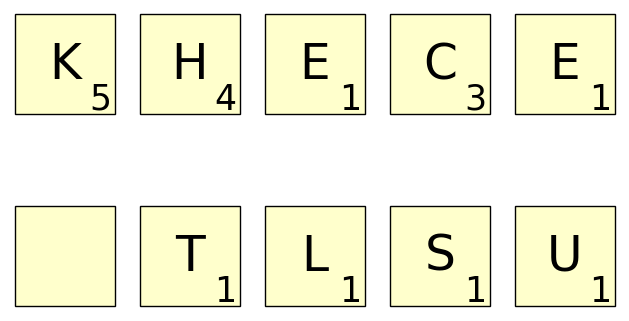

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches
import itertools
import random

# Define letter scores and frequencies
# Scrabble tile data from https://github.com/jessicatysu/scrabble 

score = { 
'A': 1, \
'B': 3, \
'C': 3, \
'D': 2, \
'E': 1, \
'F': 4, \
'G': 2, \
'H': 4, \
'I': 1, \
'J': 8, \
'K': 5, \
'L': 1, \
'M': 3, \
'N': 1, \
'O': 1, \
'P': 3, \
'Q': 10, \
'R': 1, \
'S': 1, \
'T': 1, \
'U': 1, \
'V': 4, \
'W': 4, \
'X': 8, \
'Y': 4, \
'Z': 10, \
' ': ' '} # add the emtpy tiles

frequency = {
'A': 9, \
'B': 2, \
'C': 2, \
'D': 4, \
'E': 12, \
'F': 2, \
'G': 3, \
'H': 2, \
'I': 9, \
'J': 1, \
'K': 1, \
'L': 4, \
'M': 2, \
'N': 6, \
'O': 8, \
'P': 2, \
'Q': 1, \
'R': 6, \
'S': 4, \
'T': 6, \
'U': 4, \
'V': 2, \
'W': 2, \
'X': 1, \
'Y': 2, \
'Z': 1, \
' ': 2}  # two empty tiles; see https://scrabble.hasbro.com/en-us/faq 

# define functions

def random_tile():
    bag_letters, letter_weights = zip(*frequency.items())
    letter = random.choices(bag_letters, weights=letter_weights)[0]
    return {'letter': letter, 'score': score[letter]}

def random_bag():
    """Draw 10 tiles from the full set"""
    return [random_tile() for _ in range(10)]

def draw_tile(ax, tile):
    rect = matplotlib.patches.Rectangle((0,0),1,1,linewidth=1,edgecolor='k',facecolor='#ffffcc')
    ax.add_patch(rect)
    ax.axis('off')
    ax.axis('scaled')
    ax.set(adjustable='box', aspect='equal')
    ax.set_box_aspect(1)
    ax.text(0.5, 0.5, tile['letter'], fontsize=35, horizontalalignment='center', verticalalignment='center')
    ax.text(0.85, 0.15, str(tile['score']), fontsize=25, horizontalalignment='center', verticalalignment='center')


def draw_set(tiles):
    
    fig, axes = plt.subplots(2,5)
    axes_flat_list = list(itertools.chain.from_iterable(axes))
    [draw_tile(ax, tiles[i]) for i, ax in enumerate(axes_flat_list)]
    plt.tight_layout()

draw_set(random_bag())